In [6]:
#Load the sentiment analysis result                        
import pandas as pd
df_psg = pd.read_excel('psg_sentiment_analysis_results.xlsx')
df_madrid = pd.read_excel('madrid_sentiment_analysis_results.xlsx')
#check the DataFrame
print(df_psg.head())
print(df_madrid.head())

   Number                                        textDisplay  \
0     1.0                   mbapp, dj une lgende pour vous ?   
1     NaN  @@aminatafall-o9p leader c est pas une legende...   
2     2.0                                      mbapp et bien   
3     3.0  yo mbapp quitte la nation va prendre ta formti...   
4     6.0  j'aime ce jouer de foot je suis ton plus grand...   

                                        textOriginal   authorDisplayName  \
0               Mbappé, déjà une légende pour vous ?                 NaN   
1  @@AminataFall-o9p leader c’ est pas une legend...   @momopapaillo1921   
2                                     MBAPPÉ et Bien  @FatoumataMara-x6s   
3  Yo mbappé quitte la nation va prendre ta formt...      @Yannhe-apanka   
4  J'aime ce jouer de foot je suis ton plus grand...         @DayouJenio   

            publishedAt             updatedAt language sentiment  
0  2023-11-26T12:50:33Z  2023-11-26T12:50:33Z       fr   neutral  
1  2023-11-26T13:00:02Z 

In [7]:
# Convert sentiment labels to numeric values for easier analysis
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_psg['sentiment_numeric'] = df_psg['sentiment'].map(sentiment_map)
df_madrid['sentiment_numeric'] = df_madrid['sentiment'].map(sentiment_map)

# Check the updated DataFrame
print(df_psg[['textDisplay', 'sentiment', 'sentiment_numeric']].head())
print(df_madrid[['textDisplay', 'sentiment', 'sentiment_numeric']].head())


                                         textDisplay sentiment  \
0                   mbapp, dj une lgende pour vous ?   neutral   
1  @@aminatafall-o9p leader c est pas une legende...   neutral   
2                                      mbapp et bien   neutral   
3  yo mbapp quitte la nation va prendre ta formti...  negative   
4  j'aime ce jouer de foot je suis ton plus grand...  positive   

   sentiment_numeric  
0                  0  
1                  0  
2                  0  
3                 -1  
4                  1  
                                         textDisplay sentiment  \
0  bravo kilou. guadeloupe france 971 real madrid...  positive   
1  bonnes chances je suis catalent mais  je te so...  positive   
2                         je suis barcelonais...mais   neutral   
3  bienvenue kilian mbap dans un grand club du monde  positive   
4        nous sommes  la joie de km au real madrid .  positive   

   sentiment_numeric  
0                  1  
1                  1  

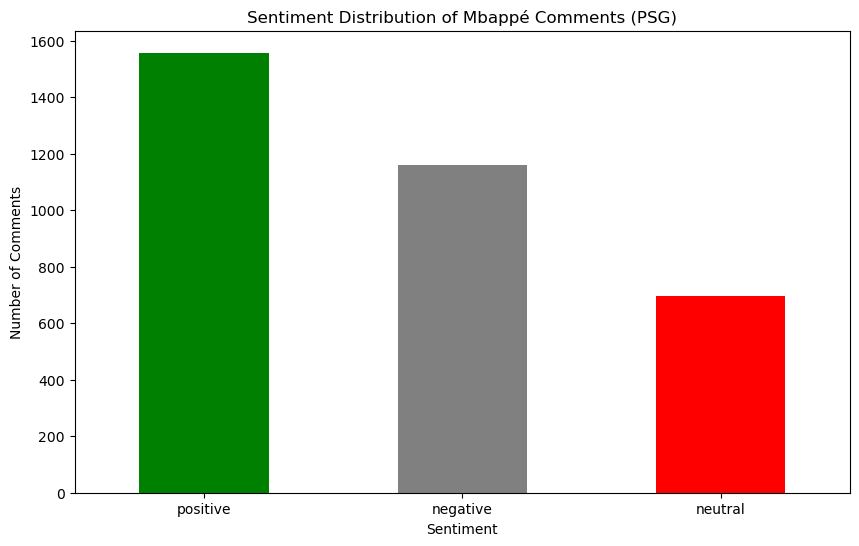

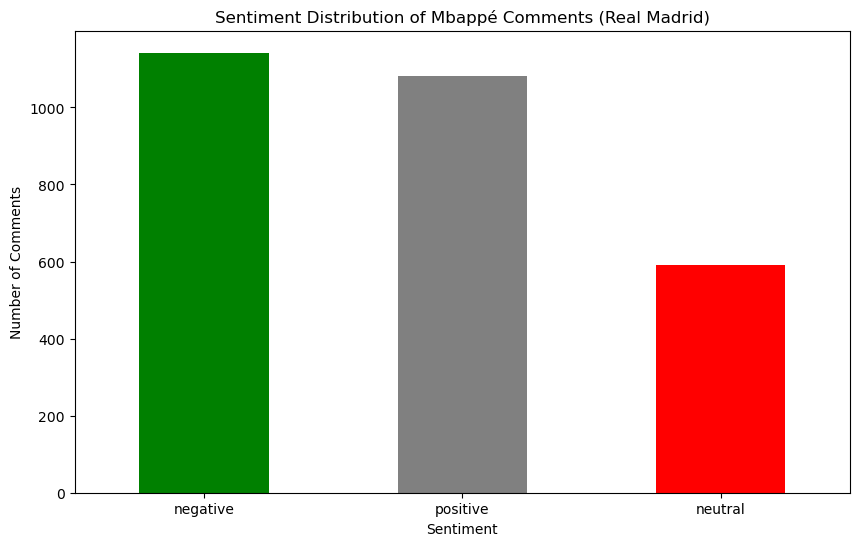

In [25]:
import matplotlib.pyplot as plt

# Plot sentiment distribution for PSG (before transfer)
plt.figure(figsize=(10, 6))
df_psg['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Mbappé Comments (PSG)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.savefig('psg_sentiment_distribution.png')
plt.show()


# Plot sentiment distribution for Real Madrid (after transfer)
plt.figure(figsize=(10, 6))
df_madrid['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Mbappé Comments (Real Madrid)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.savefig('madrid_sentiment_distribution.png')
plt.show()



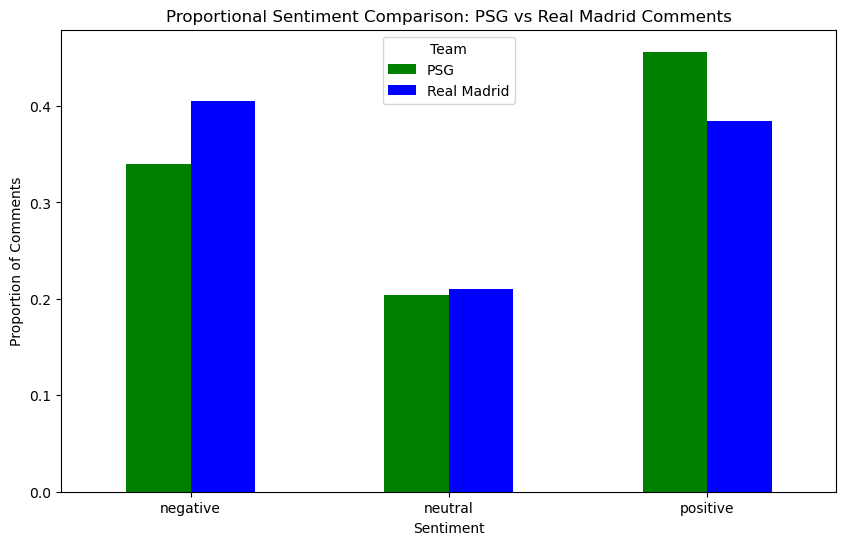

In [27]:
import matplotlib.pyplot as plt

# Normalize the sentiment distribution (proportions) for PSG and Real Madrid
psg_sentiment_proportions = df_psg['sentiment'].value_counts(normalize=True)
madrid_sentiment_proportions = df_madrid['sentiment'].value_counts(normalize=True)

# Plot normalized sentiment distribution for PSG vs Real Madrid (side-by-side)
sentiment_labels = ['negative', 'neutral', 'positive']

# Create a DataFrame with proportions for both PSG and Real Madrid
sentiment_comparison = pd.DataFrame({
    'PSG': psg_sentiment_proportions.reindex(sentiment_labels),
    'Real Madrid': madrid_sentiment_proportions.reindex(sentiment_labels)
})

# Plot side-by-side bar chart with proportions
sentiment_comparison.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'])
plt.title('Proportional Sentiment Comparison: PSG vs Real Madrid Comments')
plt.xlabel('Sentiment')
plt.ylabel('Proportion of Comments')
plt.xticks(rotation=0)
plt.legend(title='Team')
plt.savefig('sentiment_comparison_psg_vs_madrid.png')
plt.show()


C:\Users\16254\AppData\Local\Temp\ipykernel_20496\3837370350.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_psg['week'] = df_psg['publishedAt'].dt.to_period('W')
C:\Users\16254\AppData\Local\Temp\ipykernel_20496\3837370350.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_madrid['week'] = df_madrid['publishedAt'].dt.to_period('W')


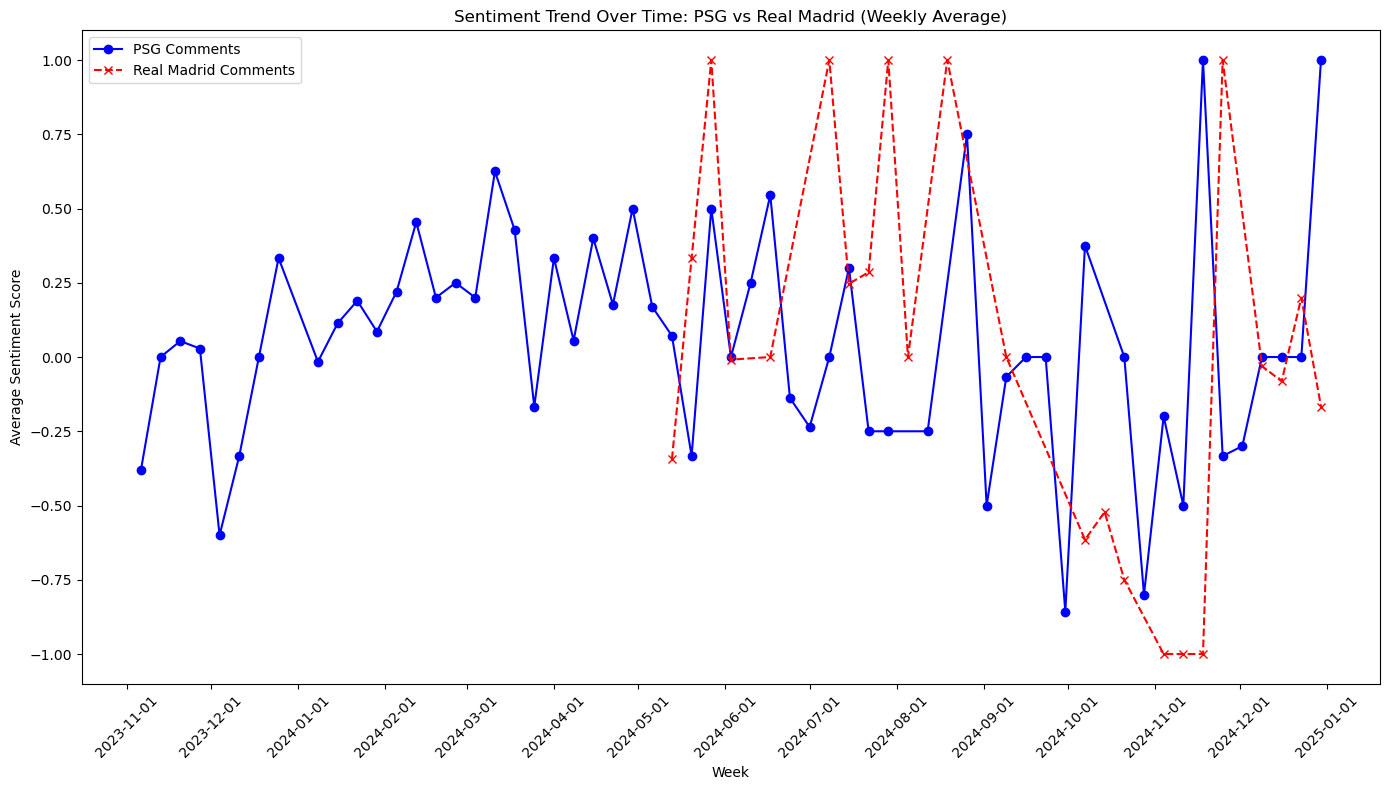

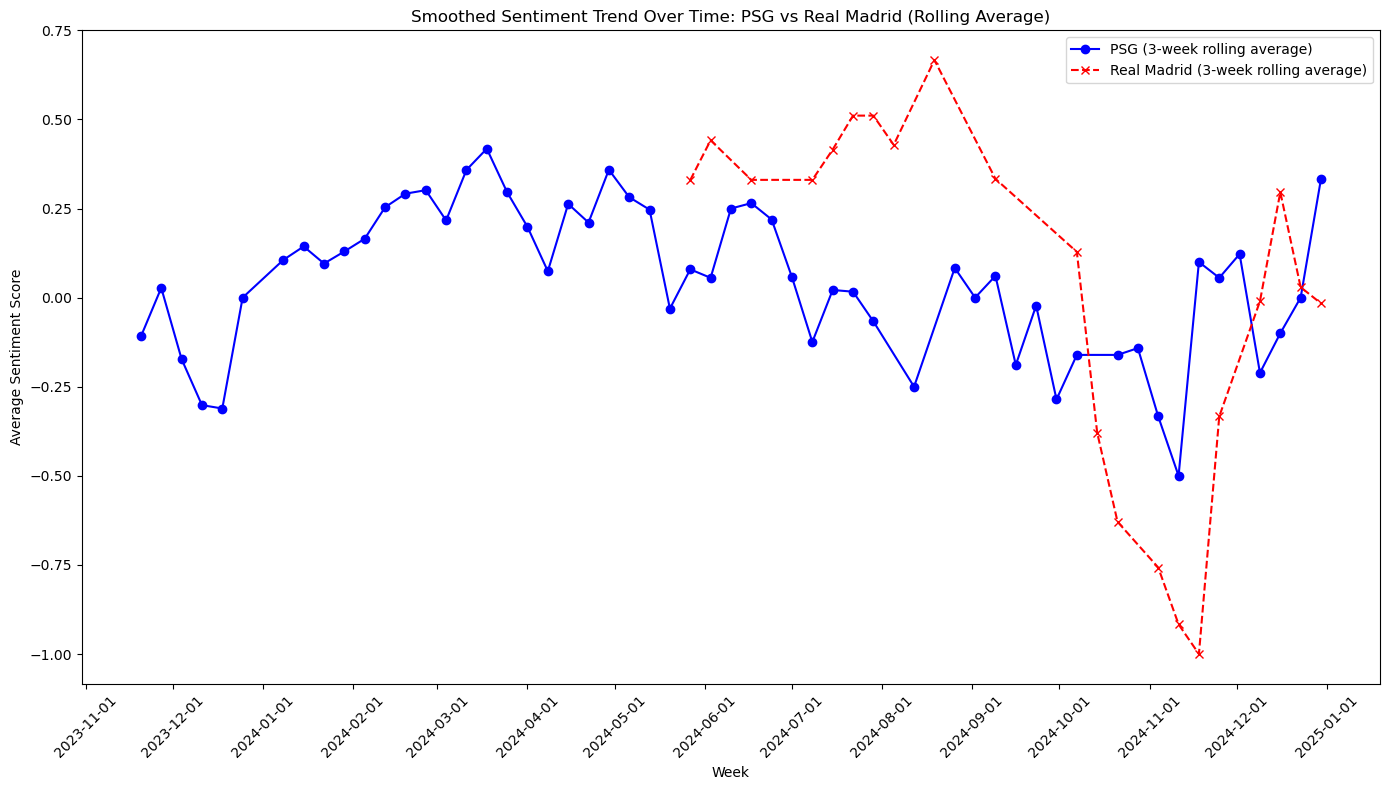

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_psg = pd.read_excel('psg_sentiment_analysis_results.xlsx')
df_madrid = pd.read_excel('madrid_sentiment_analysis_results.xlsx')

# Ensure 'date' column is in datetime format
df_psg['publishedAt'] = pd.to_datetime(df_psg['publishedAt'])
df_madrid['publishedAt'] = pd.to_datetime(df_madrid['publishedAt'])

# Convert sentiment labels to numeric values (positive = 1, neutral = 0, negative = -1)
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_psg['sentiment_numeric'] = df_psg['sentiment'].map(sentiment_map)
df_madrid['sentiment_numeric'] = df_madrid['sentiment'].map(sentiment_map)

# Group by week and calculate the average sentiment score
df_psg['week'] = df_psg['publishedAt'].dt.to_period('W')
df_madrid['week'] = df_madrid['publishedAt'].dt.to_period('W')

psg_sentiment_trend = df_psg.groupby('week')['sentiment_numeric'].mean()
madrid_sentiment_trend = df_madrid.groupby('week')['sentiment_numeric'].mean()

# Convert week period to start date of the week
psg_week_dates = psg_sentiment_trend.index.to_timestamp(how='start')
madrid_week_dates = madrid_sentiment_trend.index.to_timestamp(how='start')

# Plot sentiment trend over weeks for PSG and Real Madrid
plt.figure(figsize=(14, 8))
plt.plot(psg_week_dates, psg_sentiment_trend.values, label='PSG Comments', color='blue', marker='o')
plt.plot(madrid_week_dates, madrid_sentiment_trend.values, label='Real Madrid Comments', color='red', marker='x', linestyle='--')
plt.title('Sentiment Trend Over Time: PSG vs Real Madrid (Weekly Average)')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set x-axis ticks to show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis labels as 'YYYY-MM-DD'
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_trend_weekly_average.png')
plt.show()

# Calculate a 3-week rolling average for sentiment trends
psg_sentiment_trend_rolling = psg_sentiment_trend.rolling(window=3).mean()
madrid_sentiment_trend_rolling = madrid_sentiment_trend.rolling(window=3).mean()

# Convert rolling average week period to start date of the week
psg_rolling_week_dates = psg_sentiment_trend_rolling.index.to_timestamp(how='start')
madrid_rolling_week_dates = madrid_sentiment_trend_rolling.index.to_timestamp(how='start')

# Plot the rolling averages
plt.figure(figsize=(14, 8))
plt.plot(psg_rolling_week_dates, psg_sentiment_trend_rolling.values, label='PSG (3-week rolling average)', color='blue', marker='o')
plt.plot(madrid_rolling_week_dates, madrid_sentiment_trend_rolling.values, label='Real Madrid (3-week rolling average)', color='red', marker='x', linestyle='--')
plt.title('Smoothed Sentiment Trend Over Time: PSG vs Real Madrid (Rolling Average)')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set x-axis ticks to show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis labels as 'YYYY-MM-DD'
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_trend_rolling_average.png')
plt.show()